<a href="https://colab.research.google.com/github/TharushiSamarawickrama/DeepLearning_Lab/blob/Lab01_task02/Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# adjust only these if your folder/name changes
FOLDER = "/content/drive/MyDrive/Colab Notebooks"
FILENAME = "Au_nanoparticle_dataset.csv"

# Build path and sanity check
csv_path = os.path.join(FOLDER, FILENAME)

if not os.path.isdir(FOLDER):
    raise FileNotFoundError(
        f"Folder not found: {FOLDER}\n"
        "Open the left File Browser in Colab to confirm the folder path."
    )

if not os.path.isfile(csv_path):
    # Show what's actually inside the folder to help debug quickly
    print(f"Couldn't find {csv_path}. Here are CSVs in {FOLDER}:")
    for p in glob.glob(os.path.join(FOLDER, "*.csv")):
        print(" -", p)
    raise FileNotFoundError("Fix the filename above and re-run.")

print("Using CSV:", csv_path)

# Load CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display first 5 rows
display(df.head())

# Keep only required columns
features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
missing = [c for c in features if c not in df.columns]
if missing:
    raise KeyError(f"Missing expected columns: {missing}. Found: {list(df.columns)}")

new_df = df[features].copy()
new_df = new_df.apply(pd.to_numeric, errors='coerce').dropna(subset=features)

Mounted at /content/drive
Using CSV: /content/drive/MyDrive/Colab Notebooks/Au_nanoparticle_dataset.csv


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [2]:
# First 20 samples
print("First 20 samples:")
print(new_df.head(20))

First 20 samples:
    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


In [3]:
# Descriptive stats: mean, std, quartiles
stats_df = pd.DataFrame({
    'Mean': new_df.mean(),
    'Std Dev': new_df.std(),
    'Q1': new_df.quantile(0.25),
    'Median (Q2)': new_df.quantile(0.5),
    'Q3': new_df.quantile(0.75)
}).round(4)

print("\nDescriptive Statistics:")
print(stats_df)


Descriptive Statistics:
                Mean    Std Dev         Q1  Median (Q2)         Q3
N_total    3476.7865  3679.2868  1061.0000    1867.0000  4503.0000
N_bulk     2521.5502  2976.2325   618.7500    1199.0000  3183.0000
N_surface   955.2362   721.8702   437.0000     666.0000  1301.7500
R_avg        20.6544     7.6107    15.1607      18.6292    25.5251


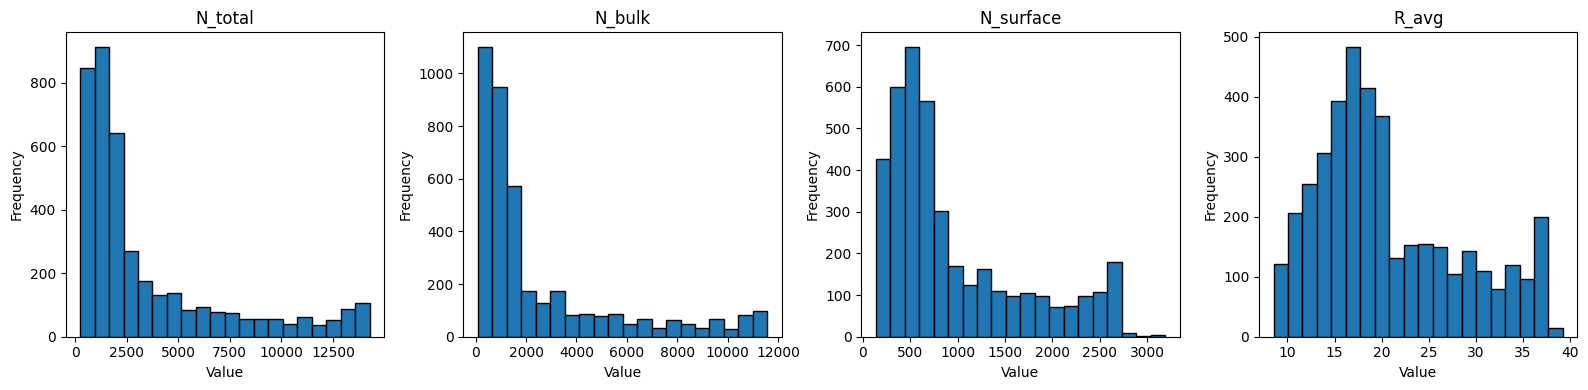

In [4]:
# Histograms in a 1x4 layout
plt.figure(figsize=(16, 4))
for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    plt.hist(new_df[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

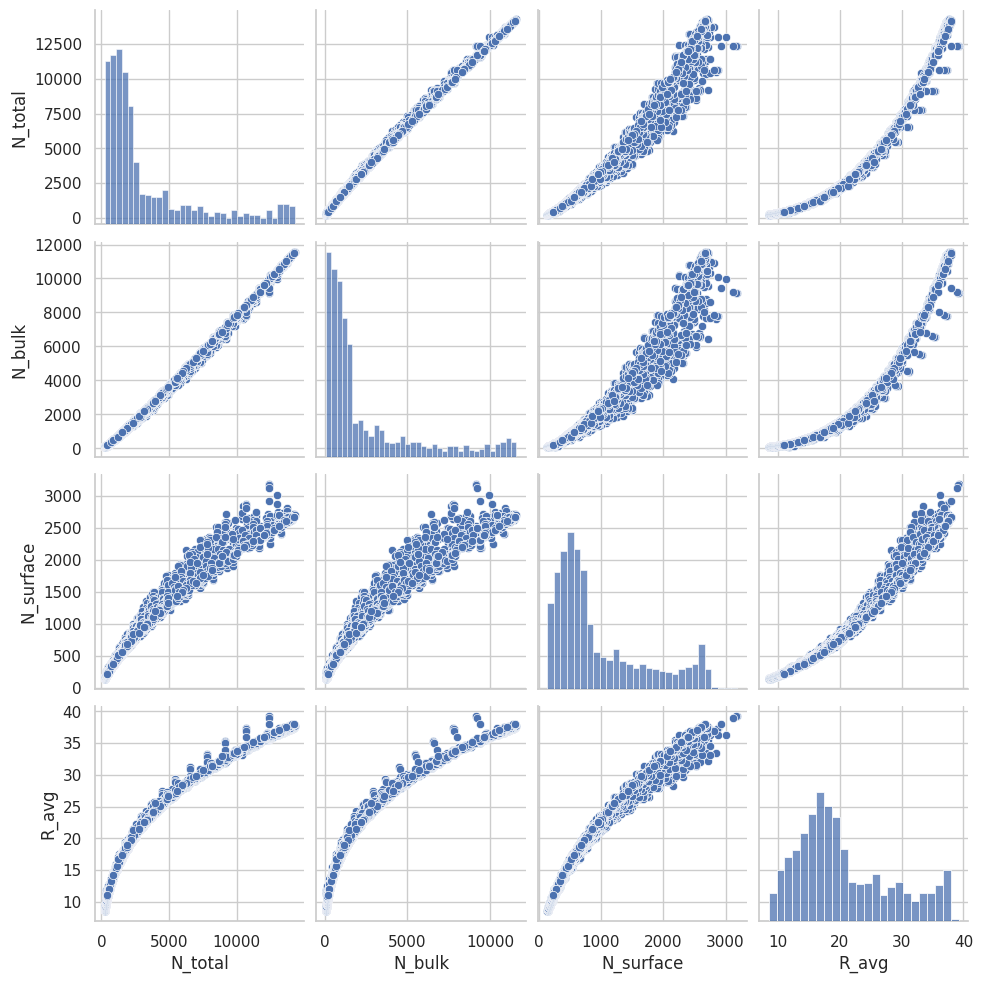

In [5]:
# Quick pairplot overview
sns.set(style="whitegrid", context="notebook")
sns.pairplot(new_df)
plt.show()


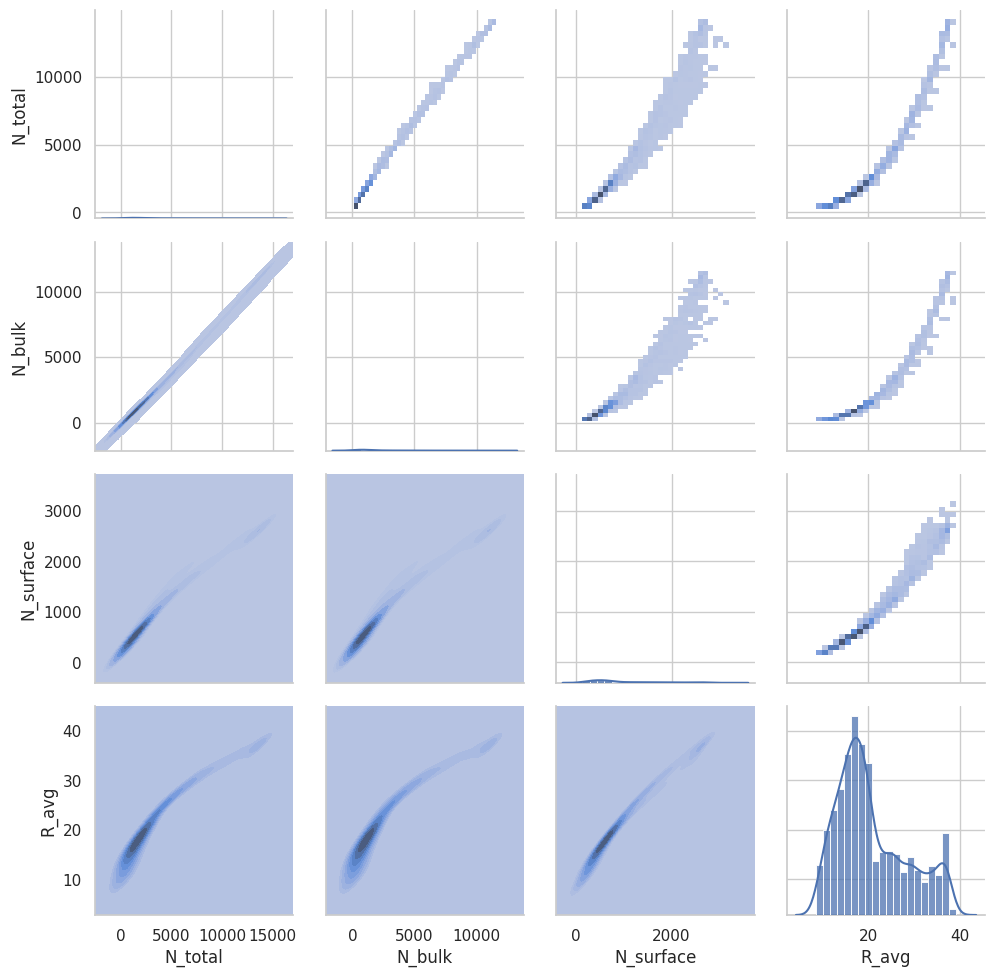

In [6]:
# Customized PairGrid:
def diag_hist_kde(x, **kwargs):
    sns.histplot(x=x, stat="density", bins=20, edgecolor=None)
    sns.kdeplot(x=x, **kwargs)

g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)
g.map_diag(diag_hist_kde)
g.map_lower(sns.kdeplot, fill=True, thresh=0)
plt.show()